In [65]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
sys.path.append('/sternadi/home/volume2/noam/SternLab')
from blast_utilities import blast_to_df
import scipy.stats
from freqs_utilities import compatibilty_old_to_new


In [39]:
b = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/associations/2543_sample_p10-km1/blasts.csv')
b = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/associations/2543_sample_p3-km1_nopip/blasts.csv')
b.sort_values('start_ref')


,read,start_ref,end_ref,start_read,end_read,strand,length,btop
0,2543_SAMPLE_p3-km1_nopip_MOLECULE_24938_CONTIG_1,1,3569,1,3569,plus,3569,3569
15951,2543_SAMPLE_p3-km1_nopip_MOLECULE_44279_CONTIG_1,1,3054,3054,1,minus,3054,3054
15952,2543_SAMPLE_p3-km1_nopip_MOLECULE_25881_CONTIG_1,1,3070,1,3070,plus,3070,2567CT178TA213CA6CG57TA17GC17CA8
15953,2543_SAMPLE_p3-km1_nopip_MOLECULE_45221_CONTIG_1,1,3044,1,3044,plus,3044,935TC2108
15954,2543_SAMPLE_p3-km1_nopip_MOLECULE_26726_CONTIG_1,1,3044,1,3044,plus,3044,258TG2426GA358
15955,2543_SAMPLE_p3-km1_nopip_MOLECULE_27117_CONTIG_1,1,3044,1,3045,plus,3045,1007-T1869GC167
15956,2543_SAMPLE_p3-km1_nopip_MOLECULE_39620_CONTIG_1,1,3045,3045,1,minus,3045,12TG241TG802TA132AC1854
15958,2543_SAMPLE_p3-km1_nopip_MOLECULE_38464_CONTIG_1,1,3040,1,3041,plus,3041,7AG2215-C817
15960,2543_SAMPLE_p3-km1_nopip_MOLECULE_34254_CONTIG_1,1,3034,1,3034,plus,3034,702GC2331
15962,2543_SAMPLE_p3-km1_nopip_MOLECULE_33216_CONTIG_1,1,3030,1,3030,plus,3030,3030


In [40]:
# double mapped percent
print(len(b[b.groupby('read').end_ref.transform('count') > 1].read.drop_duplicates()) / len(b.read.drop_duplicates()))
double_mapped = b[b.groupby('read').end_ref.transform('count') > 1]


0.0551079498961415


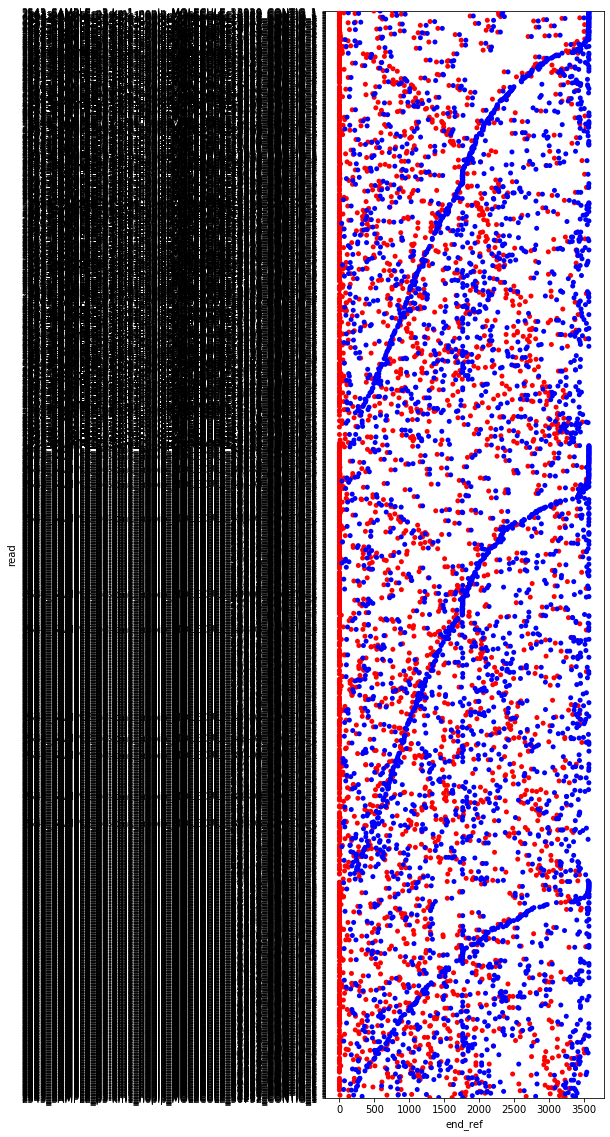

In [41]:
# double mapped plot
fig, ax = plt.subplots()
sns.stripplot(data=double_mapped, x='start_ref', y='read', color='red', ax=ax)
sns.stripplot(data=double_mapped, x='end_ref', y='read', color='blue', ax=ax)

fig.set_size_inches(5,20)

# seems to be the same as we got last time - a random addition of ~100 bases from somewhere else in the genome which tuval said is artifactual.



KeyboardInterrupt: 

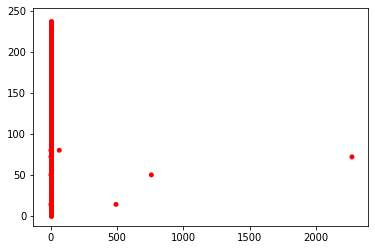

In [42]:
# all mapped plot
fig, ax = plt.subplots()
sns.stripplot(data=b, x='start_ref', y='read', color='red', ax=ax)
sns.stripplot(data=b, x='end_ref', y='read', color='blue', ax=ax)

fig.set_size_inches(5,20)

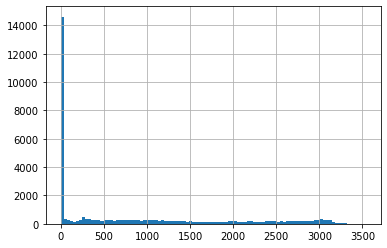

In [45]:
b.start_ref.hist(bins=100)

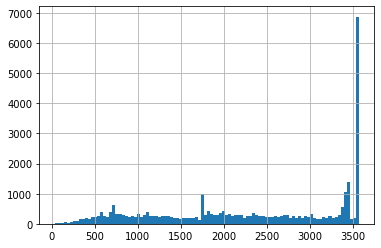

In [47]:
b.end_ref.hist(bins=100)

In [77]:
b.groupby('end_ref').btop.count().sort_values(ascending=False).reset_index().rename(columns={'btop':'count'})

,end_ref,count
0,3568,3436
1,3569,2331
2,1764,515
3,1757,303
4,3548,193
5,3439,174
6,3566,141
7,3567,137
8,3565,123
9,3447,107


In [80]:
515/len(b.read.drop_duplicates())

0.016208220557688675

In [56]:
b[b.read.isin(b[b.end_ref == 1764].read.tolist())].sort_values('read')




,read,start_ref,end_ref,start_read,end_read,strand,length,btop
4635,2543_SAMPLE_p3-km1_nopip_MOLECULE_10095_CONTIG_1,1,1764,1,1764,plus,1764,1764
4743,2543_SAMPLE_p3-km1_nopip_MOLECULE_10098_CONTIG_1,193,284,1786,1877,plus,92,92
4742,2543_SAMPLE_p3-km1_nopip_MOLECULE_10098_CONTIG_1,2,1764,1,1764,plus,1764,1003-T290AC469
4699,2543_SAMPLE_p3-km1_nopip_MOLECULE_10155_CONTIG_1,2,1764,1,1763,plus,1763,1689TC73
4708,2543_SAMPLE_p3-km1_nopip_MOLECULE_10166_CONTIG_1,1,1764,1,1764,plus,1764,661AC14AC1087
6388,2543_SAMPLE_p3-km1_nopip_MOLECULE_10351_CONTIG_1,591,1764,1,1174,plus,1174,1174
7496,2543_SAMPLE_p3-km1_nopip_MOLECULE_10497_CONTIG_1,1687,1764,1098,1021,minus,78,78
7495,2543_SAMPLE_p3-km1_nopip_MOLECULE_10497_CONTIG_1,1448,1525,78,1,minus,78,78
7494,2543_SAMPLE_p3-km1_nopip_MOLECULE_10497_CONTIG_1,1154,2080,1005,79,minus,927,927
8554,2543_SAMPLE_p3-km1_nopip_MOLECULE_10593_CONTIG_1,1054,1764,1,711,plus,711,711


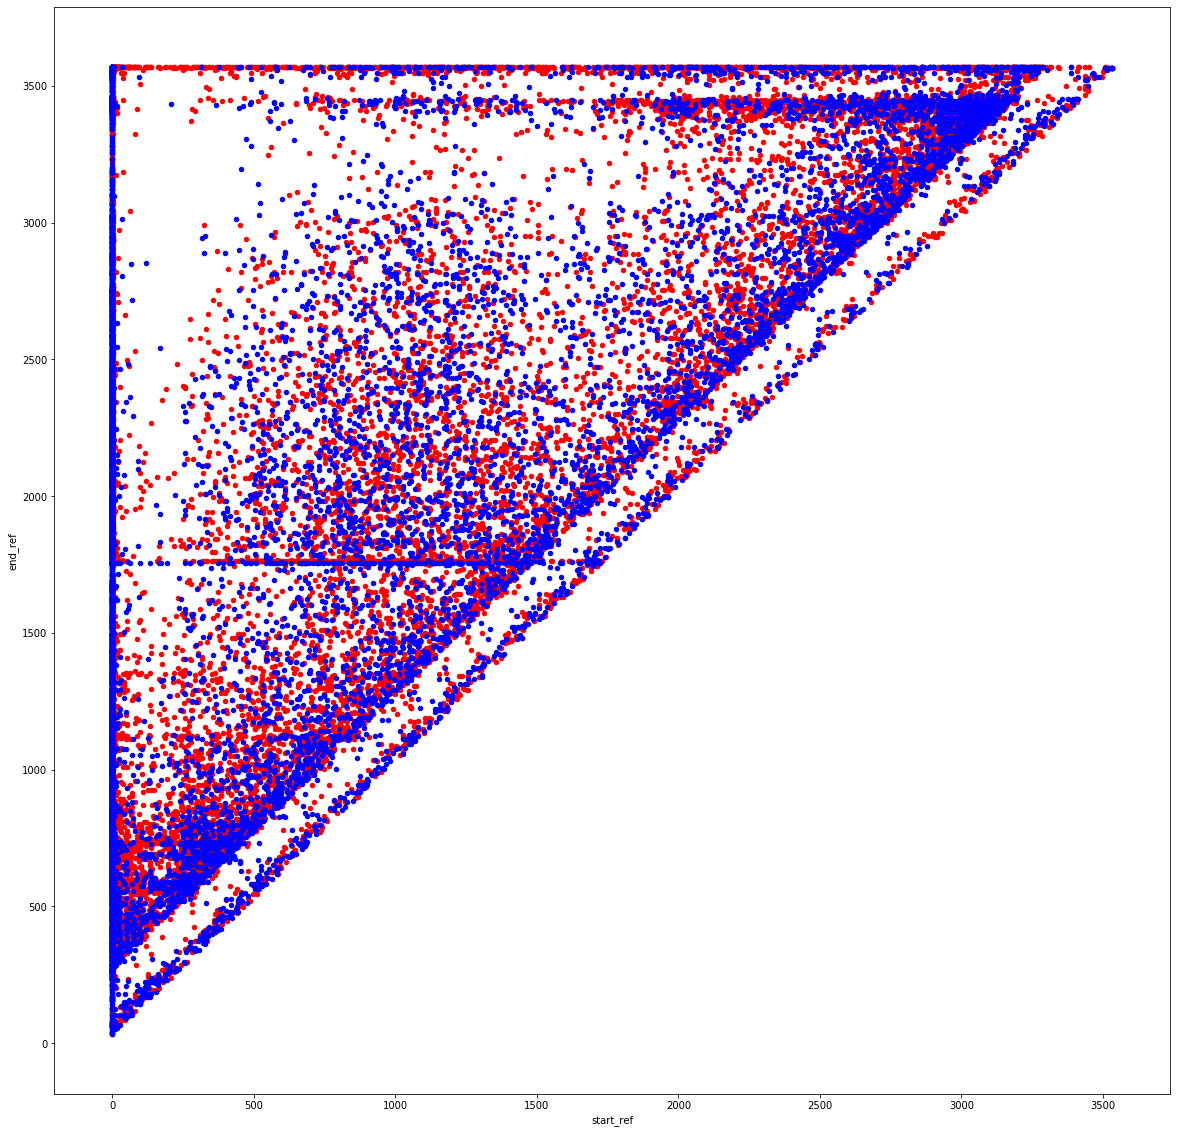

In [87]:
fig, ax = plt.subplots()
b[b.strand == 'plus'].plot(x='start_ref', y='end_ref', kind='scatter', ax=ax, color='red')
b[b.strand == 'minus'].plot(x='start_ref', y='end_ref', kind='scatter', ax=ax, color='blue')

fig.set_size_inches(20,20)

In [60]:
b.groupby(['start_ref', 'end_ref']).btop.count().sort_values()

start_ref  end_ref
1          33            1
1694       3552          1
           2064          1
           1764          1
           1757          1
           1756          1
1693       2344          1
           2100          1
           2041          1
           1972          1
1692       1757          1
           1728          1
1691       2532          1
1690       2569          1
           2389          1
           2226          1
           1983          1
           1739          1
1695       2767          1
1696       1764          1
           1985          1
           1994          1
1699       2370          1
           2301          1
           2088          1
1698       3346          1
           2556          1
           2094          1
           2013          1
1697       3568          1
                      ... 
1          862          13
           1983         13
           732          13
           1159         13
           3439         14
         

In [ ]:
def scaled_back_full_genome_heatmap(df,output_png, title, scale=10):
    '''
    Plot a heatmap for the whole genome, but scale it down. Use one value for
    every x by x square of positions, where x is defined by scale (default 10).
    '''
    df = df.drop_duplicates()
    df['start_ref'] = df.pos1 // scale * scale
    df['end_ref'] = df.pos2 // scale * scale
    #df['count'] = df.groupby(['start_ref', 'end_ref']).btop.transform('count')
    df['count'] = df.groupby(['pos1_scaled', 'pos2_scaled']).btop.transform('count')
    df = df[['pos1_scaled', 'pos2_scaled', 'count']].drop_duplicates()
    df['count_log'] = np.log(df.count)
        
    pivot = df.drop_duplicates().pivot(index='pos1_scaled', columns='pos2_scaled', values='scaled_chi2_max_log')
    fig, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(pivot, ax=ax, cbar_kws={'label': 'Ln(chi squared statistic)'}, xticklabels=20, yticklabels=20, square=True)
    ax.figure.axes[-1].yaxis.label.set_size(24)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=20)
    ax.set_ylabel('Position in Genome', fontsize=24)
    ax.set_xlabel('Position in Genome', fontsize=24)
    ax.tick_params(labelsize=20)
    ax.set_title(title + '\n', fontsize=30)
    fig.savefig(output_png, dpi=800, bbox_inches='tight')
    return

In [71]:
df = pd.read_csv('/sternadi/nobackup/volume1/noam/ms2_data/ms2_loop_genomics_20200831/freqs/all_freqs.csv')
df = compatibilty_old_to_new(df)
df['full_mutation'] = df.ref_base + df.ref_position.astype(str) + df.base 

In [69]:
df[(df.ref_base != df.base) & (df.ref_base != '-') & (df.frequency > 0.05)]

,ref_position,base,frequency,ref_base,coverage,rank,probability,File
8761,1685.0,T,0.102358,C,1866,1,1.0,p10-km1.freqs
8791,1691.0,C,0.146301,T,1825,1,1.0,p10-km1.freqs
8821,1697.0,C,0.180776,A,1831,1,1.0,p10-km1.freqs
17556,3299.0,T,0.140079,C,3291,1,1.0,p10-km1.freqs
27731,1685.0,T,0.094053,C,1446,1,1.0,p10-km2.freqs
27761,1691.0,C,0.150675,T,1407,1,1.0,p10-km2.freqs
27791,1697.0,C,0.165498,A,1426,1,1.0,p10-km2.freqs
36081,3299.0,T,0.132228,C,2473,1,1.0,p10-km2.freqs
46481,1685.0,T,0.111821,C,3756,1,1.0,p10-km3.freqs
46516,1691.0,C,0.176519,T,3654,1,1.0,p10-km3.freqs


In [73]:
df[(df.full_mutation.isin(['T323.0A', 'T960.0A', '-328.1C', 'A1408.0G']))].sort_values('frequency')

,ref_position,base,frequency,ref_base,coverage,rank,probability,File,full_mutation
1681,323.0,A,0.000000,T,1778,1,-0.00,p10-km1.freqs,T323.0A
175852,323.0,A,0.000000,T,3105,2,-0.00,p7-km2.freqs,T323.0A
159822,960.0,A,0.000000,T,5212,2,-0.00,p7-km1.freqs,T960.0A
156376,323.0,A,0.000000,T,5178,1,-0.00,p7-km1.freqs,T323.0A
142747,1408.0,G,0.000000,A,3313,2,-0.00,p3-km3.freqs,A1408.0G
136951,323.0,A,0.000000,T,3160,1,-0.00,p3-km3.freqs,T323.0A
121278,960.0,A,0.000000,T,3067,3,-0.00,p3-km2.freqs,T960.0A
117906,323.0,A,0.000000,T,3026,1,-0.00,p3-km2.freqs,T323.0A
101771,960.0,A,0.000000,T,1734,1,-0.00,p3-km1.freqs,T960.0A
98436,323.0,A,0.000000,T,1710,1,-0.00,p3-km1.freqs,T323.0A


In [93]:
b.groupby(['end_ref', 'start_ref', 'strand']).btop.count().sort_values()

end_ref  start_ref  strand
33       1          plus         1
2767     2473       minus        1
         2418       plus         1
         2406       minus        1
         2283       plus         1
         2167       plus         1
         2027       minus        1
         1695       plus         1
         1607       plus         1
         2476       plus         1
         1311       plus         1
         848        plus         1
2766     1          plus         1
2765     2719       plus         1
         2709       plus         1
         2404       minus        1
         1080       plus         1
2764     2289       plus         1
         1782       plus         1
2767     1088       plus         1
2764     3          plus         1
2768     1          minus        1
         978        minus        1
2773     1          minus        1
2772     2697       plus         1
         1972       plus         1
         928        minus        1
2771     2465       plus    